**Super Market Sales Analytics**

Data Exploration

Data Cleaning

Exploratory Data Analysis

● Which city has a better sale for products in the Electronic Accessories product line.

● Which payment method is used more often at a particular city, branch and for which product type

● Which Product type has been more purchased by female customers

● In which month does the highest number of home and lifestyle products have been sold

● At what time most of the female customers are purchasing products.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go #graphing library
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px
from scipy import stats
%matplotlib inline
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import plotly.offline as py
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Sem-2/IDS/Assignment 1/Supermarket_Sales_Dataset.csv')

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Date,Time,Payment Type,Cost Price,Gross Income,Rating
0,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Debit card,522.83,26.1415,9.1
1,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Debit card,465.76,23.2880,8.4
4,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Debit card,604.17,30.2085,5.3


In [ ]:
sales.shape

(1000, 16)

In [ ]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer Type', 'Gender',
       'Product Type', 'Unit Price', 'Quantity', 'Tax ', 'Selling Price',
       'Date', 'Time', 'Payment Type', 'Cost Price', 'Gross Income', 'Rating'],
      dtype='object')

In [ ]:
sales.dtypes

Invoice ID        object
Branch            object
City              object
Customer Type     object
Gender            object
Product Type      object
Unit Price       float64
Quantity           int64
Tax              float64
Selling Price    float64
Date              object
Time              object
Payment Type      object
Cost Price       float64
Gross Income     float64
Rating           float64
dtype: object

Here date is object , let's convert it into Datetime

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [ ]:
sales['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [ ]:
sales['Month'] = pd.DatetimeIndex(sales['Date']).month

In [ ]:
sales['Month']

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Month, Length: 1000, dtype: int64

In [ ]:
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [ ]:
sales.dtypes

Invoice ID               object
Branch                   object
City                     object
Customer Type            object
Gender                   object
Product Type             object
Unit Price              float64
Quantity                  int64
Tax                     float64
Selling Price           float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment Type             object
Cost Price              float64
Gross Income            float64
Rating                  float64
Month                     int64
Hour                      int64
dtype: object

We have changed date to datetime from object

In [ ]:
sales.set_index('Date',inplace =True)

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Time,Payment Type,Cost Price,Gross Income,Rating,Month,Hour
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2022-06-29 13:08:00,Debit card,522.83,26.1415,9.1,1,13
2019-03-08,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2022-06-29 10:29:00,Cash,76.40,3.8200,9.6,3,10
2019-03-03,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2022-06-29 13:23:00,Credit card,324.31,16.2155,7.4,3,13
2019-01-27,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2022-06-29 20:33:00,Debit card,465.76,23.2880,8.4,1,20
2019-02-08,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2022-06-29 10:37:00,Debit card,604.17,30.2085,5.3,2,10


Statistical Summary

In [ ]:
sales.describe()

,Unit Price,Quantity,Tax,Selling Price,Cost Price,Gross Income,Rating,Month,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270,1.993000,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858,0.835254,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000,1.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000,1.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000,3.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000,3.000000,20.000000


To check null values

In [ ]:
sales.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer Type    0
Gender           0
Product Type     0
Unit Price       0
Quantity         0
Tax              0
Selling Price    0
Time             0
Payment Type     0
Cost Price       0
Gross Income     0
Rating           0
Month            0
Hour             0
dtype: int64

Lets's first handle Unit Price column by using mean value

In [ ]:
avg_unit_price = sales["Unit Price"].astype("float").mean(axis=0)
sales["Unit Price"].replace(np.nan, avg_unit_price, inplace=True)

For Quantity we will use Mode value

In [ ]:
from scipy import stats
mode=stats.mode(sales['Quantity'])

print(mode)
sales['Quantity'].replace(np.nan, "mode", inplace=True)

ModeResult(mode=array([10]), count=array([119]))


For rest remaining values we will simply drop them

In [ ]:
sales.dropna(inplace=True)

Finally we can ensure that we see No null values

In [ ]:
sales.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer Type    0
Gender           0
Product Type     0
Unit Price       0
Quantity         0
Tax              0
Selling Price    0
Time             0
Payment Type     0
Cost Price       0
Gross Income     0
Rating           0
Month            0
Hour             0
dtype: int64

In [ ]:
np.round(sales.corr(),2)

,Unit Price,Quantity,Tax,Selling Price,Cost Price,Gross Income,Rating,Month,Hour
Unit Price,1.00,0.01,0.63,0.63,0.63,0.63,-0.01,-0.03,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,0.71,-0.02,-0.01,-0.01
Tax,0.63,0.71,1.00,1.00,1.00,1.00,-0.04,-0.02,-0.00
Selling Price,0.63,0.71,1.00,1.00,1.00,1.00,-0.04,-0.02,-0.00
Cost Price,0.63,0.71,1.00,1.00,1.00,1.00,-0.04,-0.02,-0.00
Gross Income,0.63,0.71,1.00,1.00,1.00,1.00,-0.04,-0.02,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,-0.04,1.00,-0.04,-0.03
Month,-0.03,-0.01,-0.02,-0.02,-0.02,-0.02,-0.04,1.00,0.04
Hour,0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.03,0.04,1.00


# EXPLORATORY DATA ANALYSIS

Visualization

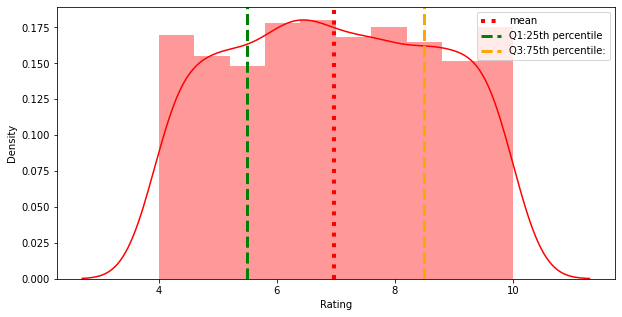

In [ ]:
# Univariate analysis
plt.figure(figsize=(10,5))
sns.distplot(sales.Rating)
plt.axvline(x=sales.Rating.mean(),label='mean',color='red', linestyle='dotted',lw=4)
plt.axvline(x=np.percentile(sales['Rating'],25),label = 'Q1:25th percentile',color='green', linestyle='dashed',lw=3)
plt.axvline(x=np.percentile(sales['Rating'],75),label = 'Q3:75th percentile:',color='orange', linestyle='dashed',lw=3 )
plt.legend()
plt.show()

The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. We can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th quartiles respectively.The mean rating is ~7 across products.

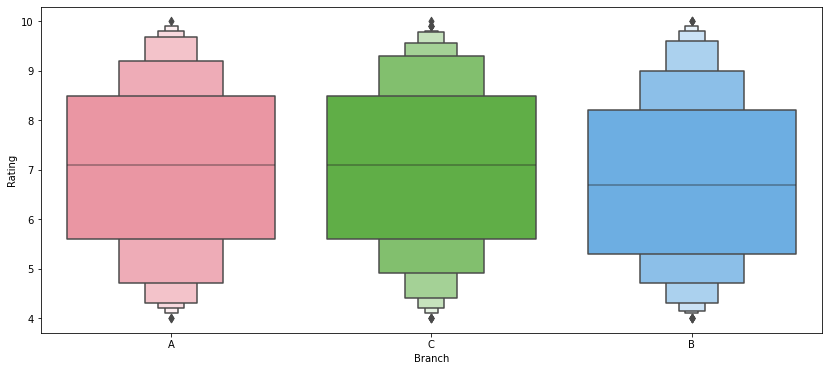

In [ ]:
# Bivariate analysis
plt.figure(figsize=(14,6))
sns.boxenplot(x="Branch", y = "Rating" ,data = sales)
plt.show()

In [ ]:
# target Variable Rating mean
sales.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

The average rating of branch A and C is more than seven and branch B is less than 7.

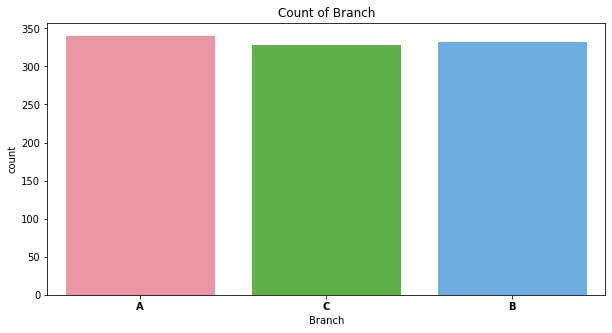

In [ ]:
# Aggregate sales across branches
plt.figure(figsize=(10,5))
sns.countplot(sales.Branch).set_title("Count of Branch")
plt.xticks(fontsize=10,fontweight='bold')
plt.show()

There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches

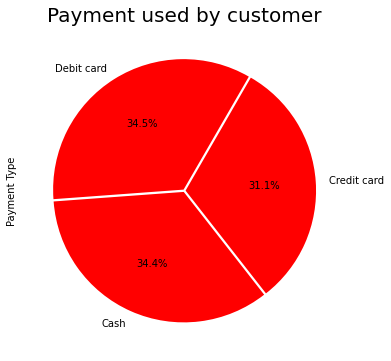

In [ ]:
# Popular payment method used by customers
plt.figure(figsize=(6,6))
sales['Payment Type'].value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.1f%%',startangle=60)
plt.title('Payment used by customer',fontsize=20)
plt.show()

The most popular payment method is Debit card.

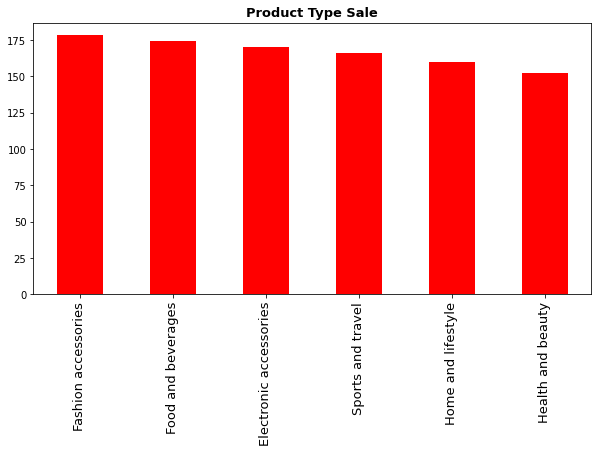

In [ ]:
# Product Type vs Sale
plt.figure(figsize=(10,5))
sales['Product Type'].value_counts().plot.bar().set_title("Product Type Sale",fontsize=13,fontweight='bold')
plt.xticks(fontsize=13)
plt.show()

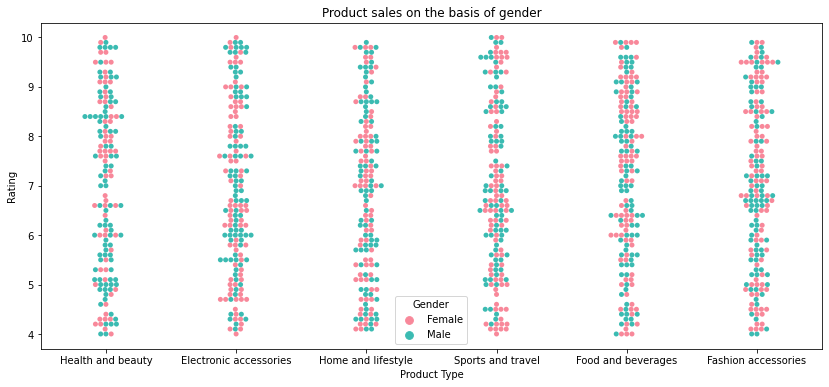

In [ ]:
# Product sales on the basis of Gender

plt.figure(figsize=(14,6))
sns.swarmplot(x= "Product Type", y = "Rating", hue = "Gender", data = sales).set_title("Product sales on the basis of gender")
plt.show()

Fashion accessories, Food and beverages are the most bought products by Female customers. Electronic accessories, Health and beauty are the most bought products by Male customers.

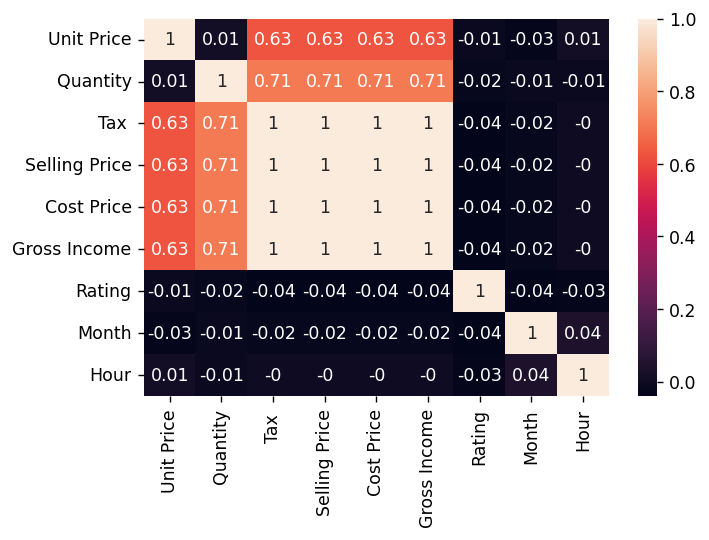

In [ ]:
plt.figure(dpi=125)
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

The best correlated are Tax, Selling Price, Cost Price and Gross Income sold with a correlation of 1.

Also, the above mentioned all has a good correlation of 0.71 with Quantity

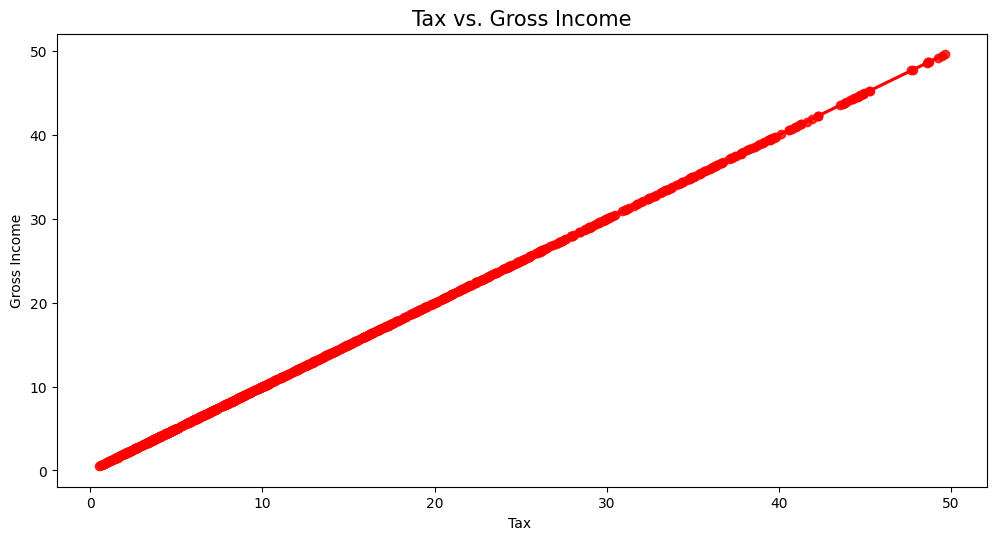

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax ',y='Gross Income',data=sales,color='Red')
plt.xlabel('Tax ')
plt.ylabel('Gross Income')
plt.title('Tax vs. Gross Income',fontsize=15)
plt.show()

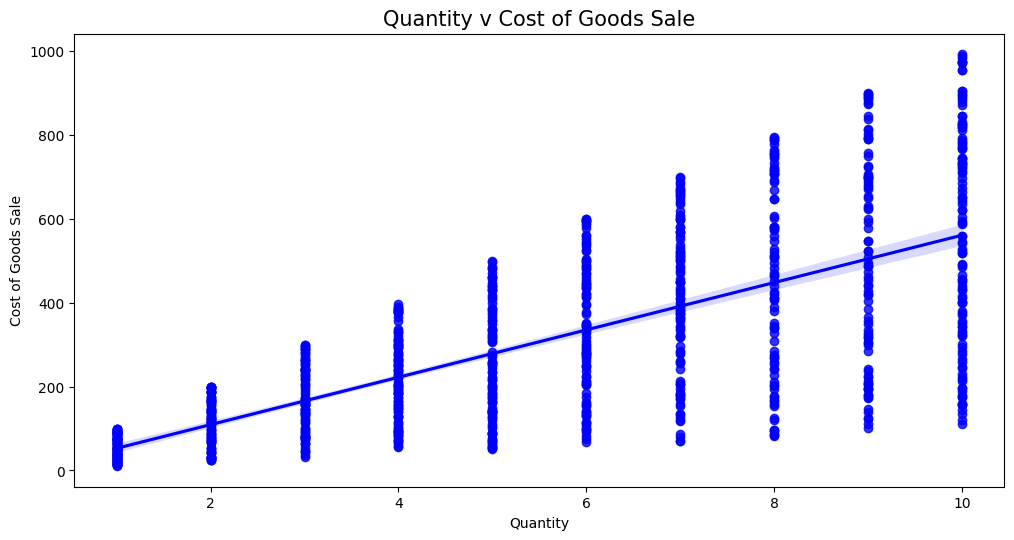

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='Cost Price',data=sales,color='blue')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

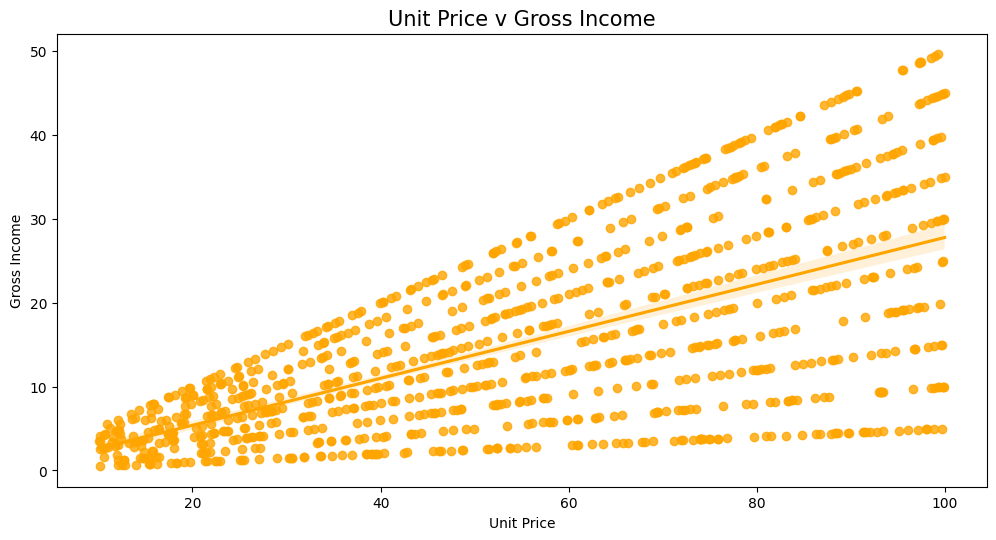

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit Price',y='Gross Income',data=sales,color='orange')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

To see the distribution of different Ratings as target variable.

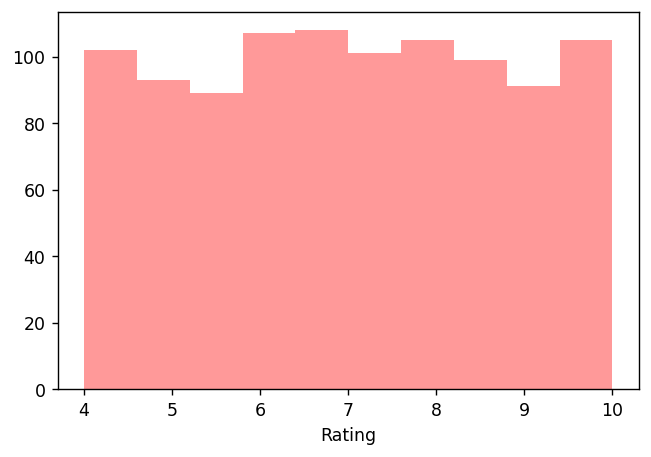

In [ ]:
plt.figure(dpi=125)
sns.distplot(sales['Rating'],kde=False)
plt.show()

Taking mean for variable Rating

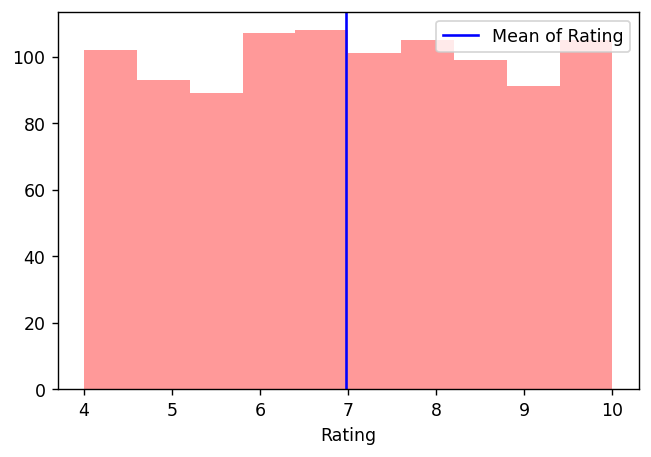

In [ ]:
plt.figure(dpi=125)
sns.distplot(sales['Rating'],kde=False)
plt.axvline(x=np.mean(sales['Rating']),c='blue',label='Mean of Rating')
plt.legend()
plt.show()

Histogram for all

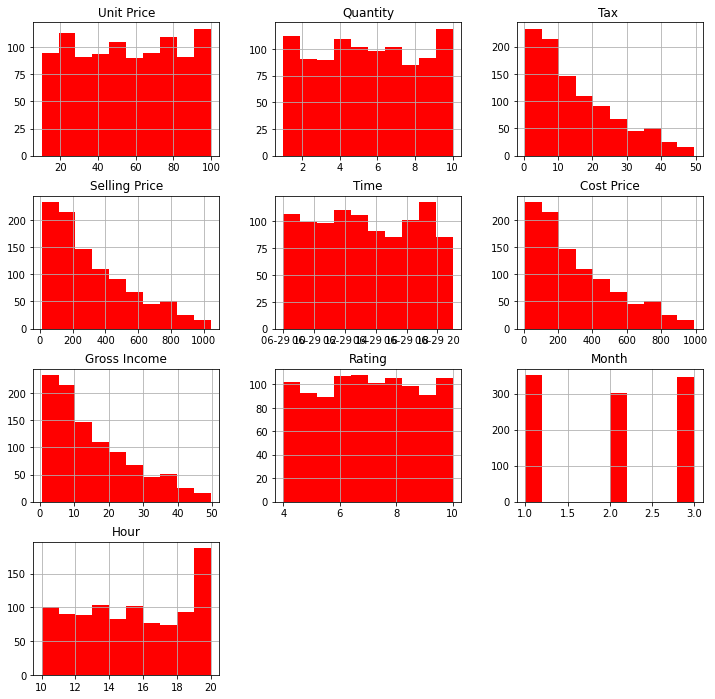

In [ ]:
sales.hist(figsize=(12,12))
plt.show()

Branch A - 340
Branch B - 328
Branch C - 332


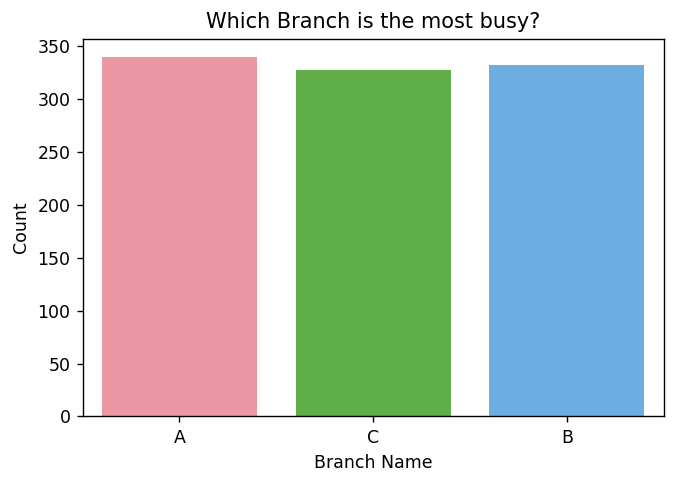

In [ ]:
# Branch Count
plt.figure(dpi=125)
sns.countplot(sales['Branch'])
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')
A,B,C =sales.Branch.value_counts()

print('Branch A -',A)
print('Branch B -',C)
print('Branch C -',B)


plt.show()

Renaming variable by removing space.

In [ ]:
sales_2 = sales.rename(columns={'Payment Type': 'Payment'})

Debit card - 345
Cash - 344
Credit card - 311


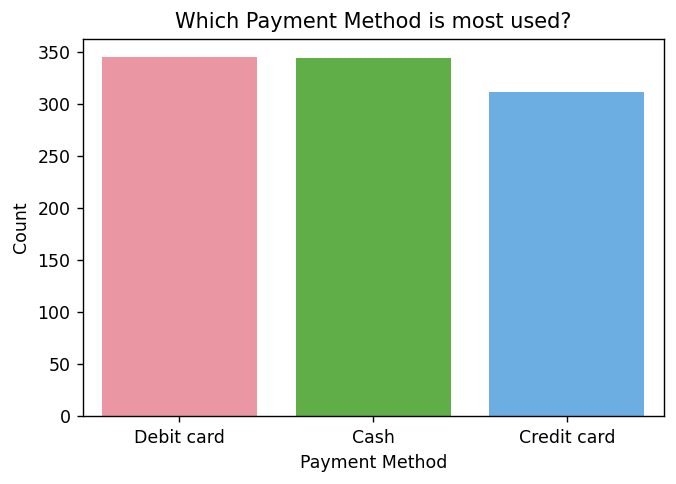

In [ ]:
plt.figure(dpi=125)
sns.countplot(sales_2['Payment'])
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')
A,B,C =sales_2.Payment.value_counts()

print('Debit card -',A)
print('Cash -',B)
print('Credit card -',C)
plt.show()

Banglore - 340
Mysore - 328
Mangalore - 332


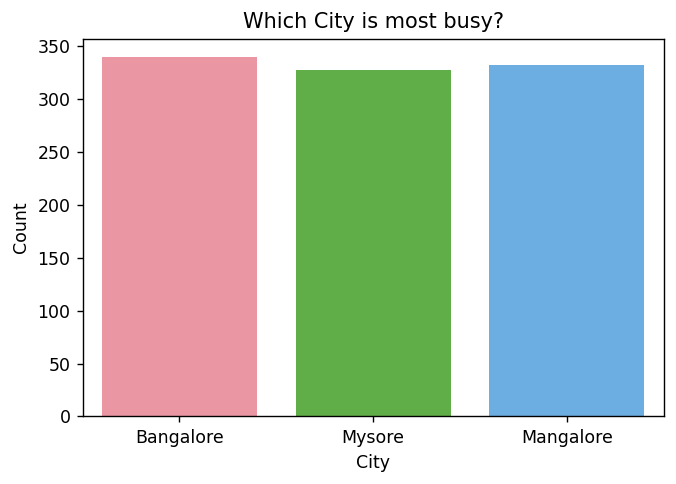

In [ ]:
plt.figure(dpi=125)
sns.countplot(sales['City'])
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Which City is most busy?')
A,B,C =sales.City.value_counts()

print('Banglore -',A)
print('Mysore -',C)
print('Mangalore -',B)
plt.show()

Male- 499
Female - 501


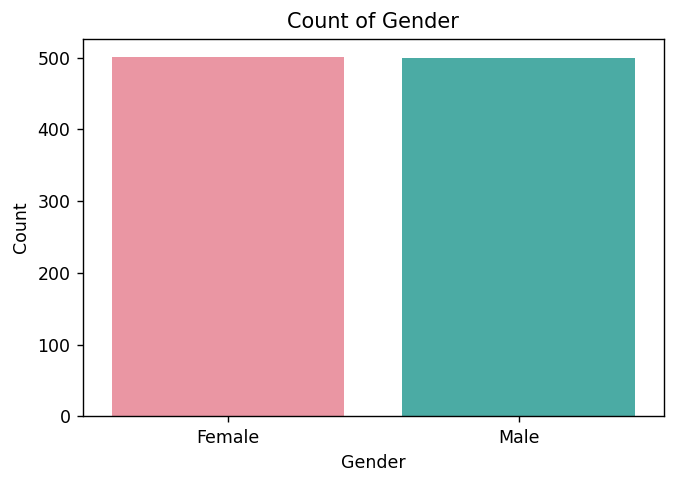

In [ ]:
plt.figure(dpi=125)
sns.countplot(sales['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
A,B =sales.Gender.value_counts()

print('Male-',B)
print('Female -',A)

plt.show()

One-Hot Encoding

Visualizing a Gender based comparison related to Product Type

In [ ]:
gender_sep  = pd.get_dummies(sales['Gender'])
gender_sep.head()

,Female,Male
Date,,
2019-01-05,1,0
2019-03-08,1,0
2019-03-03,0,1
2019-01-27,0,1
2019-02-08,0,1


In [ ]:
sales_gen = pd.concat([sales, gender_sep], axis = 1)
sales_gen.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,Time,Payment Type,Cost Price,Gross Income,Rating,Month,Hour,Female,Male
Date,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Bangalore,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2022-06-29 13:08:00,Debit card,522.83,26.1415,9.1,1,13,1,0
2019-03-08,226-31-3081,C,Mysore,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2022-06-29 10:29:00,Cash,76.40,3.8200,9.6,3,10,1,0
2019-03-03,631-41-3108,A,Bangalore,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2022-06-29 13:23:00,Credit card,324.31,16.2155,7.4,3,13,0,1
2019-01-27,123-19-1176,A,Bangalore,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2022-06-29 20:33:00,Debit card,465.76,23.2880,8.4,1,20,0,1
2019-02-08,373-73-7910,A,Bangalore,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2022-06-29 10:37:00,Debit card,604.17,30.2085,5.3,2,10,0,1


# Which Product type has been more purchased by female customers.

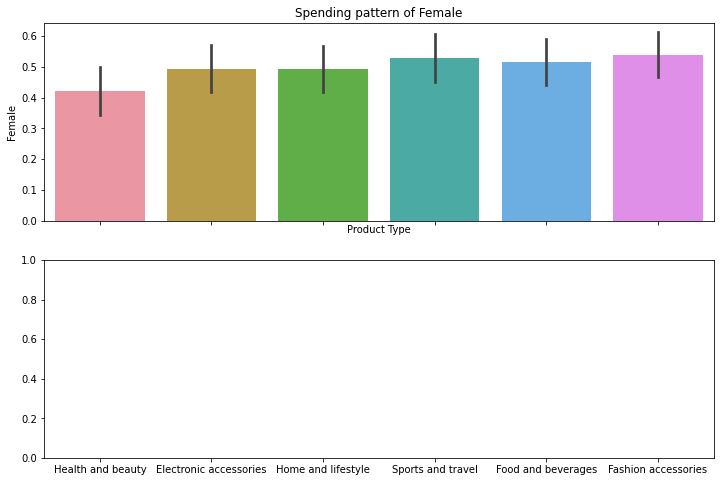

In [ ]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(12,8))
sns.barplot(ax=axes[0], x=sales['Product Type'], y=sales_gen['Female']).set_title("Spending pattern of Female")
plt.show()

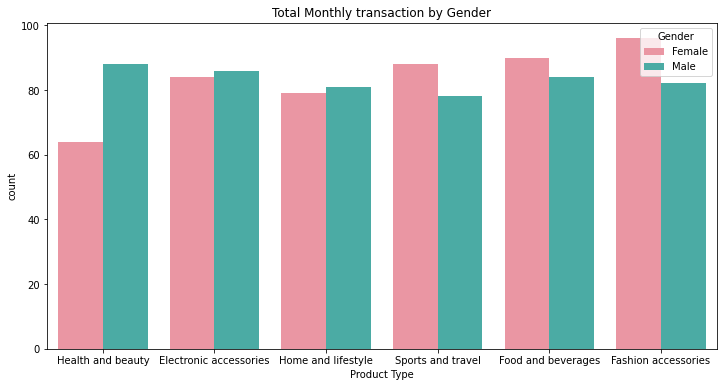

In [ ]:
from pandas.core.frame import DataFrame
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(sales['Product Type'], hue = sales.Gender)

# Which city has a better sale for products in the Electronic Accessories product line.

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 9 Text major ticklabel objects>)

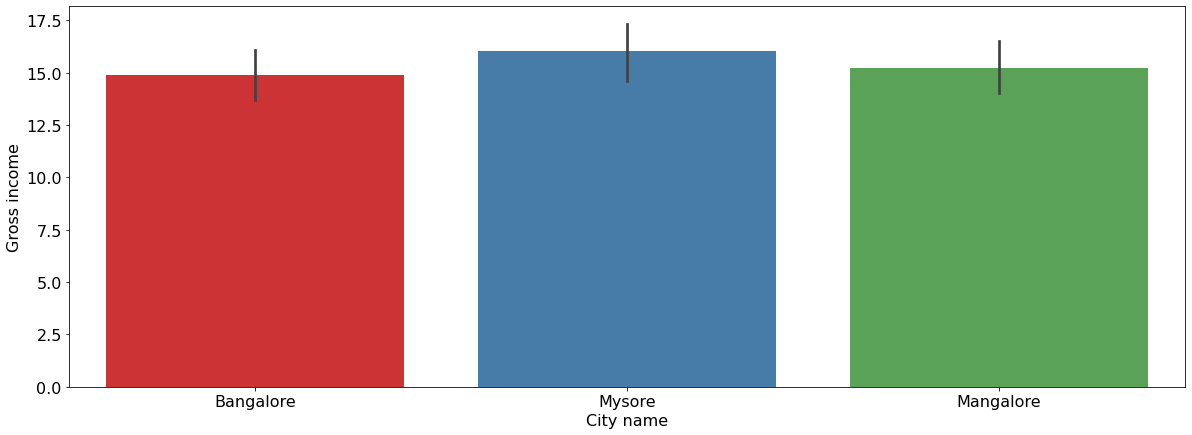

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(sales['City'],sales['Gross Income'],palette='Set1')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')

It is obvious that Mysore is the most profitable city as it is having better sale.

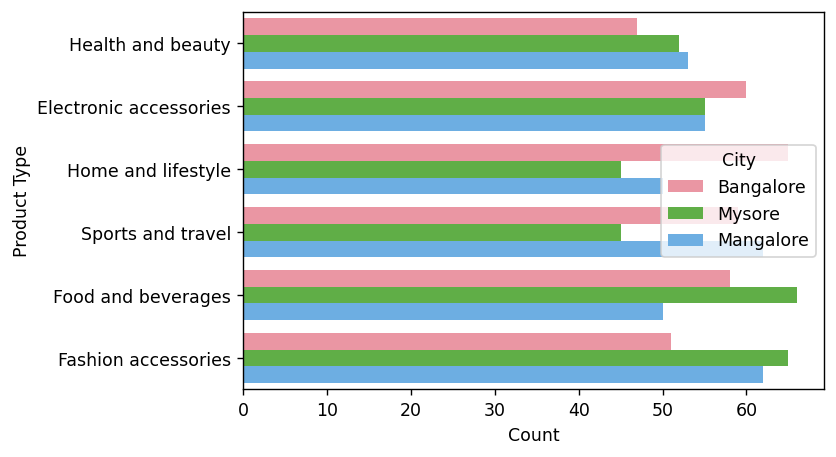

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Product Type', hue = "City", data = sales)
plt.xlabel('Count')
plt.show()

# Which payment method is used more often at a particular:

# 1.City

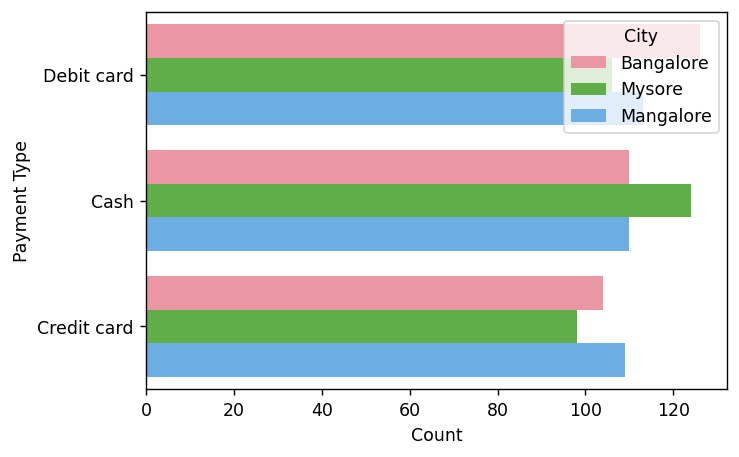

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Payment Type', hue = "City", data = sales)
plt.xlabel('Count')
plt.show()

# Which payment method is used more often at a particular:

# 2.Branch

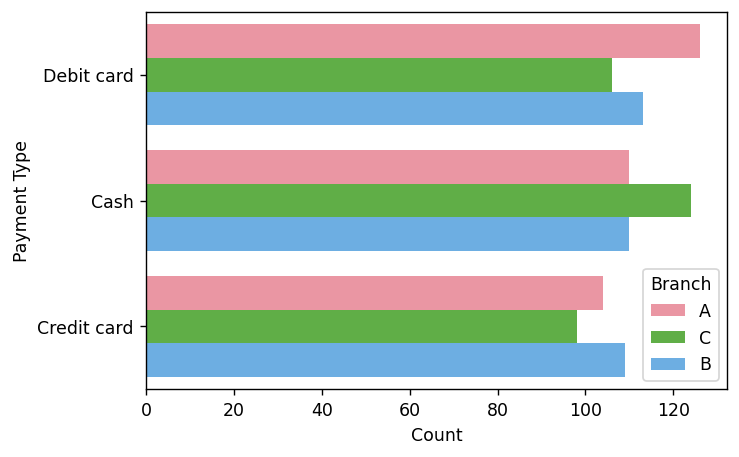

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Payment Type', hue = "Branch", data = sales)
plt.xlabel('Count')
plt.show()

# Which payment method is used more often at a particular:

# 3.Product Type

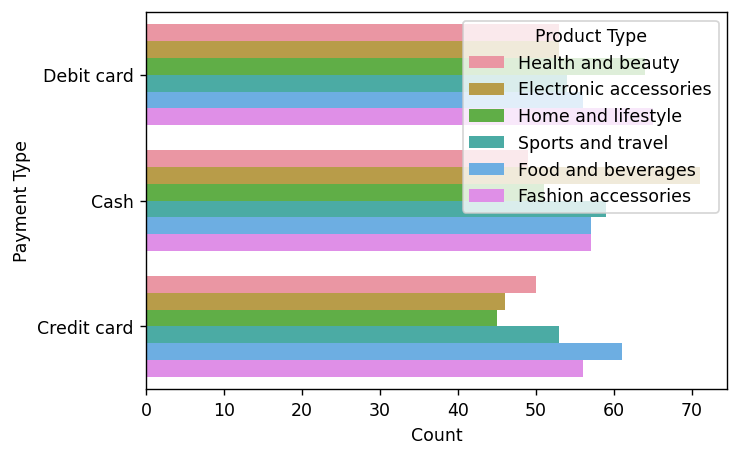

In [ ]:
plt.figure(dpi=125)
sns.countplot(y ='Payment Type', hue = "Product Type", data = sales)
plt.xlabel('Count')
plt.show()

# In which month does the highest number of home and lifestyle products have been sold?

In [ ]:
sales['Month']

Date
2019-01-05    1
2019-03-08    3
2019-03-03    3
2019-01-27    1
2019-02-08    2
             ..
2019-01-29    1
2019-03-02    3
2019-02-09    2
2019-02-22    2
2019-02-18    2
Name: Month, Length: 1000, dtype: int64

In [ ]:
month_counts=sales['Month'].value_counts()
month_counts

1    352
3    345
2    303
Name: Month, dtype: int64

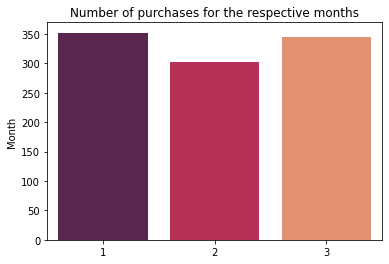

In [ ]:
plt.title("Number of purchases for the respective months")
sns.barplot(x=month_counts.index,y=month_counts, palette='rocket');

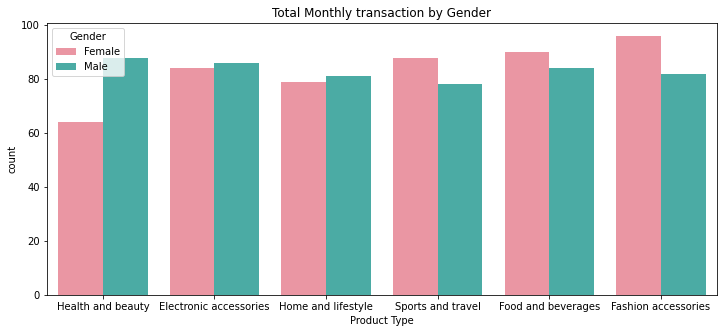

In [ ]:
# Spending patterns
plt.figure(figsize=(12, 5))
plt.title('Total Monthly transaction by Gender')
sns.countplot(x='Product Type', hue = 'Gender', data=sales)
plt.show()

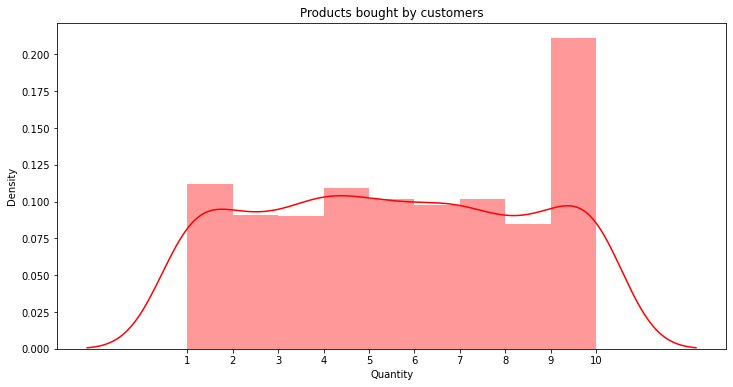

In [ ]:
# Buying trend by customers

plt.figure(figsize = (12,6))
x_ticks = [1,2,3,4,5,6,7,8,9,10]
sns.distplot(sales.Quantity).set_title('Products bought by customers')
plt.xticks(x_ticks)
plt.show()

In [ ]:
pivot=sales.unstack()
pivot

            Date      
Invoice ID  2019-01-05    750-67-8428
            2019-03-08    226-31-3081
            2019-03-03    631-41-3108
            2019-01-27    123-19-1176
            2019-02-08    373-73-7910
                             ...     
Hour        2019-01-29             13
            2019-03-02             17
            2019-02-09             13
            2019-02-22             15
            2019-02-18             13
Length: 17000, dtype: object

# At what time most of the female customers are purchasing products?

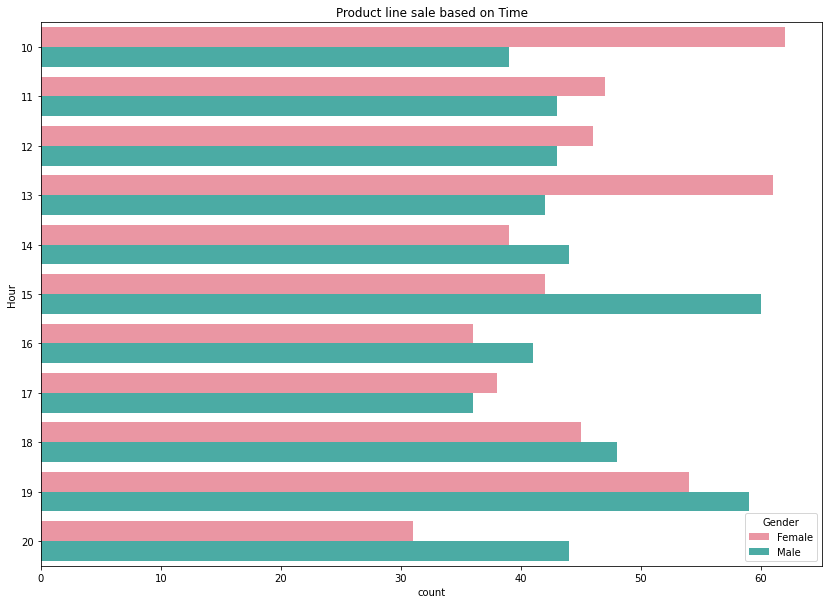

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(y=sales['Hour'],hue=sales['Gender']).set_title("Product line sale based on Time")
plt.show()

At 10 am most of the female customers are purchasing products.

# Data wrangling

In [ ]:
sales.duplicated().sum()

0

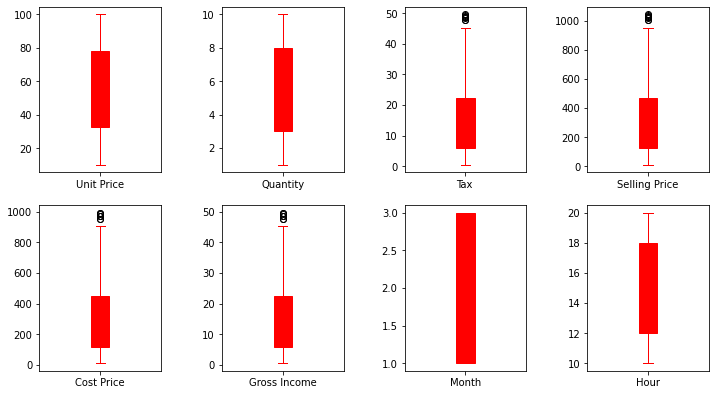

In [ ]:
#Checking outliers of numerical data:

sales_numeric_plot = sales.drop(columns = ['Customer Type','Gender','Product Type','Time','Rating'])
sales_numeric_plot.plot(subplots =True, kind = 'box', layout = (4,4), figsize = (12,14),patch_artist=True)
plt.subplots_adjust(wspace = 0.5)

In [ ]:
def out_lairs(col):
    Q1 = sales[col].quantile(0.25)
    Q3 =  sales[col].quantile(0.75)
    IQR = Q3-Q1
    sales_out = sales[((sales[col] < (Q1-1.5*IQR)) | (sales[col] > (Q3+1.5*IQR)))]
    return sales_out[col]

out_lairs("Selling Price")      #Outlier in Selling Price

Date
2019-01-16    1003.590
2019-02-08    1039.290
2019-02-15    1042.650
2019-01-09    1002.120
2019-02-08    1020.705
2019-01-30    1034.460
2019-01-12    1023.750
2019-01-15    1022.385
2019-03-02    1022.490
Name: Selling Price, dtype: float64

# Feature Engineering

In [ ]:
def outleirs(col):
    x=sales[col].quantile(0.50)
    y=sales[col].quantile(0.95)
    sales[col] = np.where(sales[col] >y, x, sales[col])

In [ ]:
outleirs("Selling Price") #Imputing outliers for Selling Price

In [ ]:
outleirs("Cost Price") #Imputing outliers for Cost Price

In [ ]:
outleirs("Tax ") #Imputing outliers for Tax

In [ ]:
outleirs("Gross Income")  #Imputing outliers for Gross Income

# Model Building

In [ ]:
from sklearn.preprocessing import LabelEncoder
# re processing the data
from sklearn.preprocessing import StandardScaler
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
df1=sales.copy()

In [ ]:
# Removing redundant columns inorder to increase accuracy]
df1.drop(columns=['Invoice ID','Time'],inplace=True) # dropping the columns

In [ ]:
objList = df1.select_dtypes(include = "object").columns       # extracting object data type from dataset
print (objList)

Index(['Branch', 'City', 'Customer Type', 'Gender', 'Product Type',
       'Payment Type'],
      dtype='object')


Feature Selection

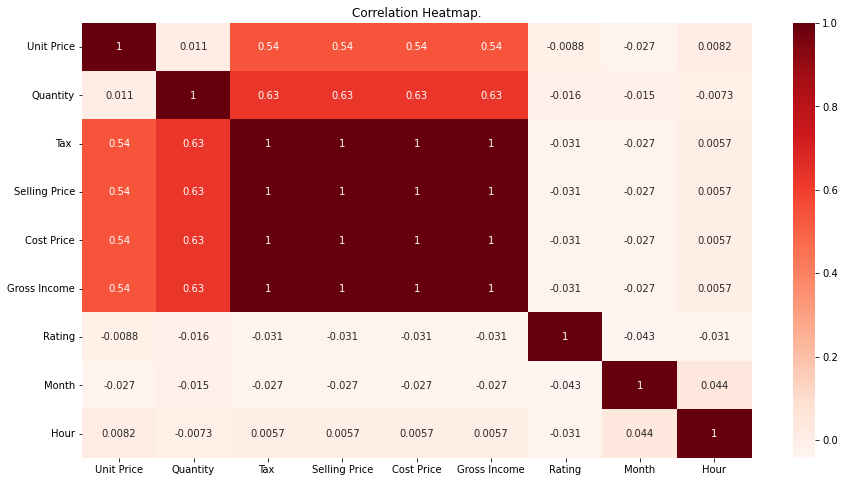

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,cmap=plt.cm.Reds).set_title('Correlation Heatmap.')
plt.show()

Here the Tax, Selling Price, Cost Price, Gross Income relation with Quantity is highly correlated with 0.63, followed with Unit Price at 0.54.

Feature Extraction

In [ ]:
sales['Payment Type'].replace('Cash', 0,inplace=True)
sales['Payment Type'].replace('Credit card', 1,inplace=True)
sales['Payment Type'].replace('Debit card', 2,inplace=True)

sales['City'].replace('Bangalore', 0,inplace=True)
sales['City'].replace('Mysore', 1,inplace=True)
sales['City'].replace('Mangalore', 2,inplace=True)

sales['High Rating'] = sales['Rating'].apply(lambda x: 1 if x > 7 else 0)
sales['Low Rating'] = sales['Rating'].apply(lambda x: 1 if x < 7 else 0)

sales['Gender'].replace('Female', 0,inplace=True)
sales['Gender'].replace('Male', 1,inplace=True)

sales['Branch'].replace('A', 0,inplace=True)
sales['Branch'].replace('B', 1,inplace=True)
sales['Branch'].replace('C', 2,inplace=True)

sales['High Payment'] = sales['Cost Price'].apply(lambda x: 1 if x > 500 else 0)
sales['Low Payment'] = sales['Cost Price'].apply(lambda x: 1 if x < 500 else 0)

sales['Is Member'] = sales['Customer Type'].replace(['Member','Normal'],[1,0])
sales['Not Member'] = sales['Customer Type'].replace(['Member','Normal'],[0,1])

In [ ]:
sales.head(5)

,Invoice ID,Branch,City,Customer Type,Gender,Product Type,Unit Price,Quantity,Tax,Selling Price,...,Gross Income,Rating,Month,Hour,High Rating,Low Rating,High Payment,Low Payment,Is Member,Not Member
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,0,0,Member,0,Health and beauty,74.69,7,26.1415,548.9715,...,26.1415,9.1,1,13,1,0,1,0,1,0
2019-03-08,226-31-3081,2,1,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,...,3.8200,9.6,3,10,1,0,0,1,0,1
2019-03-03,631-41-3108,0,0,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,...,16.2155,7.4,3,13,1,0,0,1,0,1
2019-01-27,123-19-1176,0,0,Member,1,Health and beauty,58.22,8,23.2880,489.0480,...,23.2880,8.4,1,20,1,0,0,1,1,0
2019-02-08,373-73-7910,0,0,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,...,30.2085,5.3,2,10,0,1,1,0,0,1


In [ ]:
X.head()

,Unit Price,Quantity,Tax,Payment Type,Cost Price,Gross Income,Low Rating
Date,,,,,,,
2019-01-05,74.69,7,26.1415,2,522.83,26.1415,0
2019-03-08,15.28,5,3.8200,0,76.40,3.8200,0
2019-03-03,46.33,7,16.2155,1,324.31,16.2155,0
2019-01-27,58.22,8,23.2880,2,465.76,23.2880,0
2019-02-08,86.31,7,30.2085,2,604.17,30.2085,1


Random Forest Classifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
rfc_10= RandomForestClassifier(n_estimators=10)

In [ ]:
rfc_10.fit(X,y)

RandomForestClassifier(n_estimators=10)

In [ ]:
Importances=rfc_10.feature_importances_

In [ ]:
X_RF=pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":Importances})
X_RF.set_index('Importances')

,Features
Importances,
0.029740,Unit Price
0.004541,Quantity
0.026967,Tax
0.005190,Payment Type
0.034000,Cost Price
0.032108,Gross Income
0.867453,Low Rating


In [ ]:
X_RF=X_RF.sort_values('Importances')

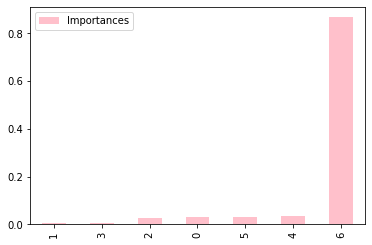

In [ ]:
X_RF.plot.bar(color='pink')

In [ ]:
X.head()

,Unit Price,Quantity,Tax,Payment Type,Cost Price,Gross Income,Low Rating
Date,,,,,,,
2019-01-05,74.69,7,26.1415,2,522.83,26.1415,0
2019-03-08,15.28,5,3.8200,0,76.40,3.8200,0
2019-03-03,46.33,7,16.2155,1,324.31,16.2155,0
2019-01-27,58.22,8,23.2880,2,465.76,23.2880,0
2019-02-08,86.31,7,30.2085,2,604.17,30.2085,1


# K Means

In [ ]:
for column in df1.columns:
    if df1[column].dtype == np.number:
        continue
    df1[column] = LabelEncoder().fit_transform(df1[column])

K = 2

In [ ]:
model = KMeans(n_clusters=2, init="k-means++",random_state=0)
model.fit(df1)

KMeans(n_clusters=2, random_state=0)

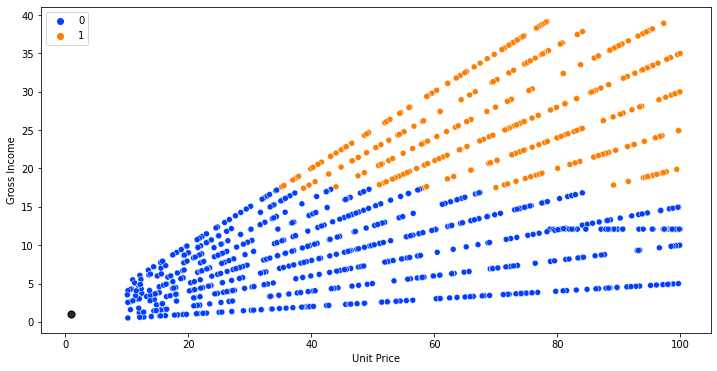

In [ ]:
## Visulazing the model using number of clusters: 2

clusters = model.fit_predict(df1)
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1, x="Unit Price", y="Gross Income", hue= clusters, palette = "bright")
centers = model.cluster_centers_
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha = 0.6)
plt.xlabel("Unit Price")
plt.ylabel("Gross Income")
plt.show()

K = 3

In [ ]:
# Evaluating the model performance
model = KMeans(n_clusters=3, init="k-means++",random_state=0)
model.fit(df1)

KMeans(n_clusters=3, random_state=0)

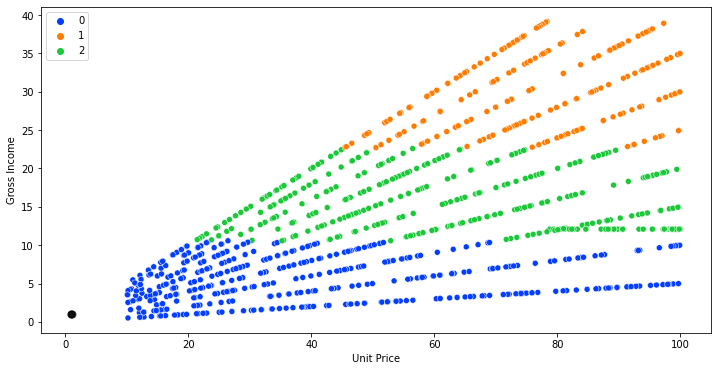

In [ ]:
clusters = model.fit_predict(df1)
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1, x="Unit Price", y="Gross Income", hue= clusters, palette = "bright")
centers = model.cluster_centers_
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha = 0.6)
plt.xlabel("Unit Price")
plt.ylabel("Gross Income")
plt.show()

K = 4

In [ ]:
# Evaluating the model performance
model = KMeans(n_clusters=4, init="k-means++",random_state=0)
model.fit(df1)

KMeans(n_clusters=4, random_state=0)

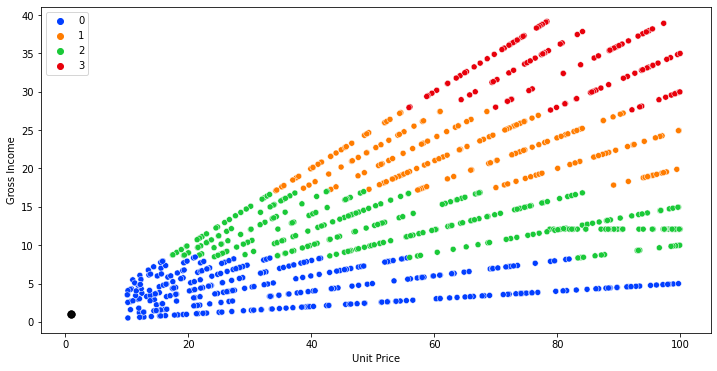

In [ ]:
clusters = model.fit_predict(df1)
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1, x="Unit Price", y="Gross Income", hue= clusters, palette = "bright")
centers = model.cluster_centers_
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha = 0.6)
plt.xlabel("Unit Price")
plt.ylabel("Gross Income")
plt.show()

# K Medoids

In [ ]:
pip install sklearn_extras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pylab as plt
import seaborn as sns
import sklearn_extra.cluster._k_medoids
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

Standardization

In [ ]:
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
df_scaled_copy = df_scaled.copy(deep=True)

K = 2

In [ ]:
kmedo = KMedoids(n_clusters =2, random_state=1)
kmedo.fit(df_scaled_copy)
df1['KMedoids_Labels'] = kmedo.predict(df_scaled_copy)

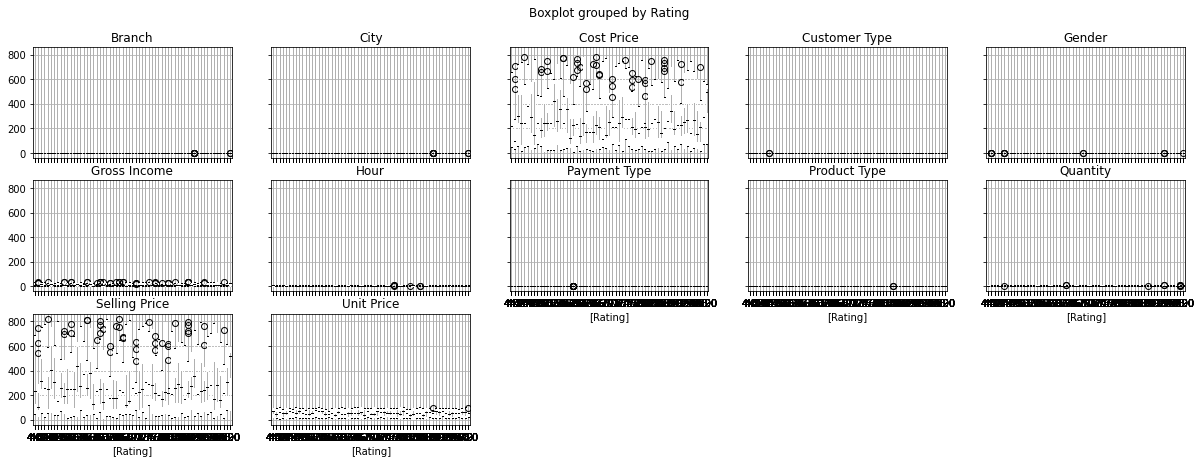

In [ ]:
features_with_lables = ['Branch', 'City', 'Customer Type', 'Gender', 'Product Type',
       'Unit Price', 'Quantity','Selling Price', 'Payment Type', 'Cost Price', 'Gross Income', 'Rating','Hour']

df1[features_with_lables].boxplot(by='Rating',layout = (3,5),figsize=(20,7))
plt.show()

K = 3

In [ ]:
kmedo = KMedoids(n_clusters =3, random_state=1)
kmedo.fit(df_scaled_copy)
df1['KMedoids_Labels'] = kmedo.predict(df_scaled_copy)

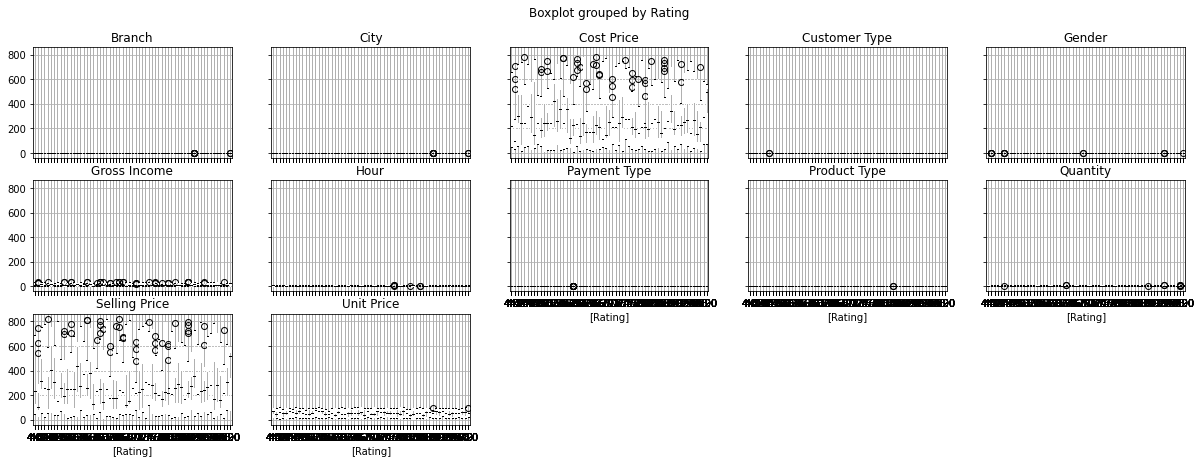

In [ ]:
features_with_lables = ['Branch', 'City', 'Customer Type', 'Gender', 'Product Type',
       'Unit Price', 'Quantity','Selling Price', 'Payment Type', 'Cost Price', 'Gross Income', 'Rating','Hour']

df1[features_with_lables].boxplot(by='Rating',layout = (3,5),figsize=(20,7))
plt.show()

K = 4

In [ ]:
kmedo = KMedoids(n_clusters =4, random_state=1)
kmedo.fit(df_scaled_copy)
df1['KMedoids_Labels'] = kmedo.predict(df_scaled_copy)

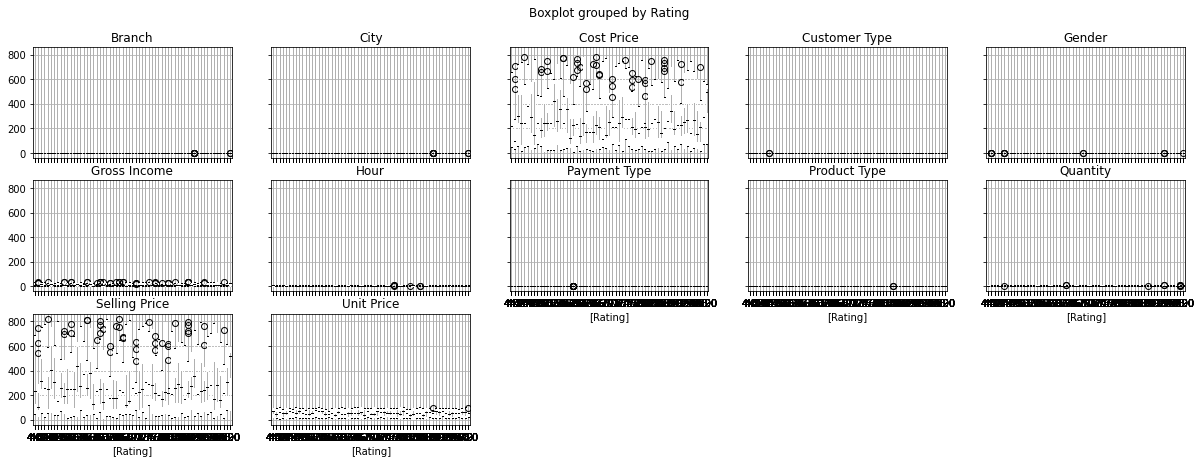

In [ ]:
features_with_lables = ['Branch', 'City', 'Customer Type', 'Gender', 'Product Type',
       'Unit Price', 'Quantity','Selling Price', 'Payment Type', 'Cost Price', 'Gross Income', 'Rating','Hour']

df1[features_with_lables].boxplot(by='Rating',layout = (3,5),figsize=(20,7))
plt.show()

# AHC - Agglomerative Hierarchical Clustering

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

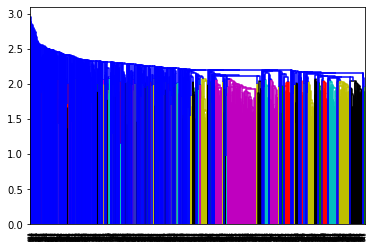

In [ ]:
# Single linkage:

mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

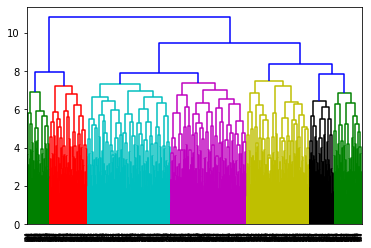

In [ ]:
# Complete linkage

mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

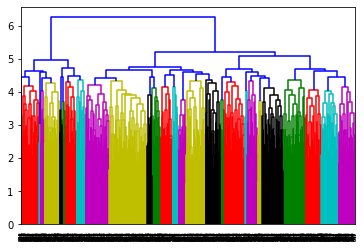

In [ ]:
# Average linkage

mergings = linkage(df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
df_scaled['Cluster_Labels'] = cluster_labels

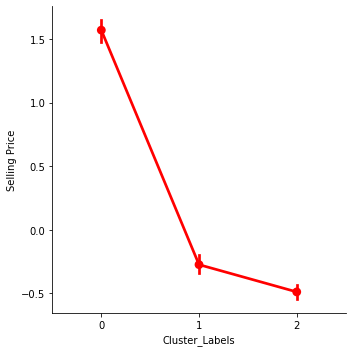

In [ ]:
# Plot Cluster Id vs Selling Price

sns.factorplot(x='Cluster_Labels', y='Selling Price', data=df_scaled)

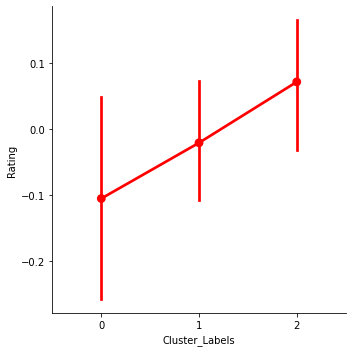

In [ ]:
# Plot Cluster Id vs Rating

sns.factorplot(x='Cluster_Labels', y='Rating', data=df_scaled)

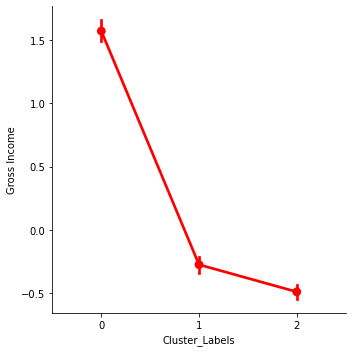

In [ ]:
# Plot Cluster Id vs Gross Income

sns.factorplot(x='Cluster_Labels', y='Gross Income', data=df_scaled)

# Machine Learning models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')

In [ ]:
for a,b in zip([lr],["Logistic Regression"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    Y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,Y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.982500
[Logistic Regression] test data accuracy is : 0.970000


In [ ]:
from sklearn.metrics import classification_report

lr_Y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_Y_preds))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       114
           1       0.93      1.00      0.97        86

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
for a,b in zip([dt],["Decision Tree"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    Y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,Y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.955000


In [ ]:
from sklearn.metrics import classification_report

dt_Y_preds = dt.predict(X_test)

print(classification_report(y_test,dt_Y_preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       114
           1       0.93      0.97      0.95        86

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



Comparing both

In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test)
             }
model_scores

{'Decision tree': 0.955, 'Logistic Regression': 0.97}

In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,Decision tree
accuracy,0.97,0.955


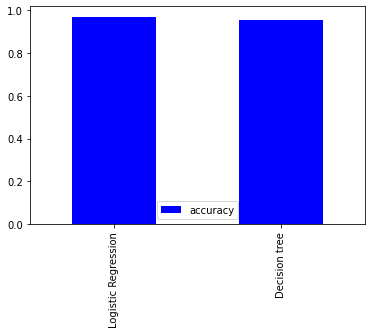

In [ ]:
model_compare.T.plot(kind='bar',color='b')

Feature Highlight

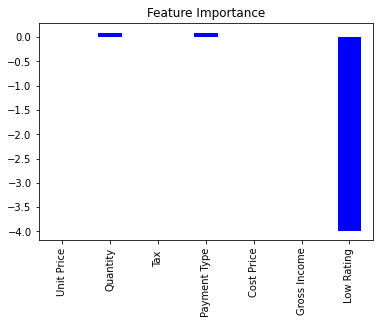

In [ ]:
# by Logistic Regression

feature_dict=dict(zip(X.columns,list(lr.coef_[0])))
feature_dict
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",color='b',legend=False,title="Feature Importance")